<a href="https://colab.research.google.com/github/Konkamahesh/OBJECT-DETECTION-/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install opencv-python
! pip install tqdm
! pip install sklearn
! pip install pyyaml
! pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=e7832fb2f92198cec6d20738c98982d2128fb6ab07c310b40b91d6fbb28c8995
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2 
import os 
import shutil 
from tqdm.notebook import tqdm 
from sklearn.model_selection import train_test_split
import yaml
import torch

In [ ]:
annotations = pd.read_csv('../content/train_solution_bounding_boxes (1).csv')
annotations.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


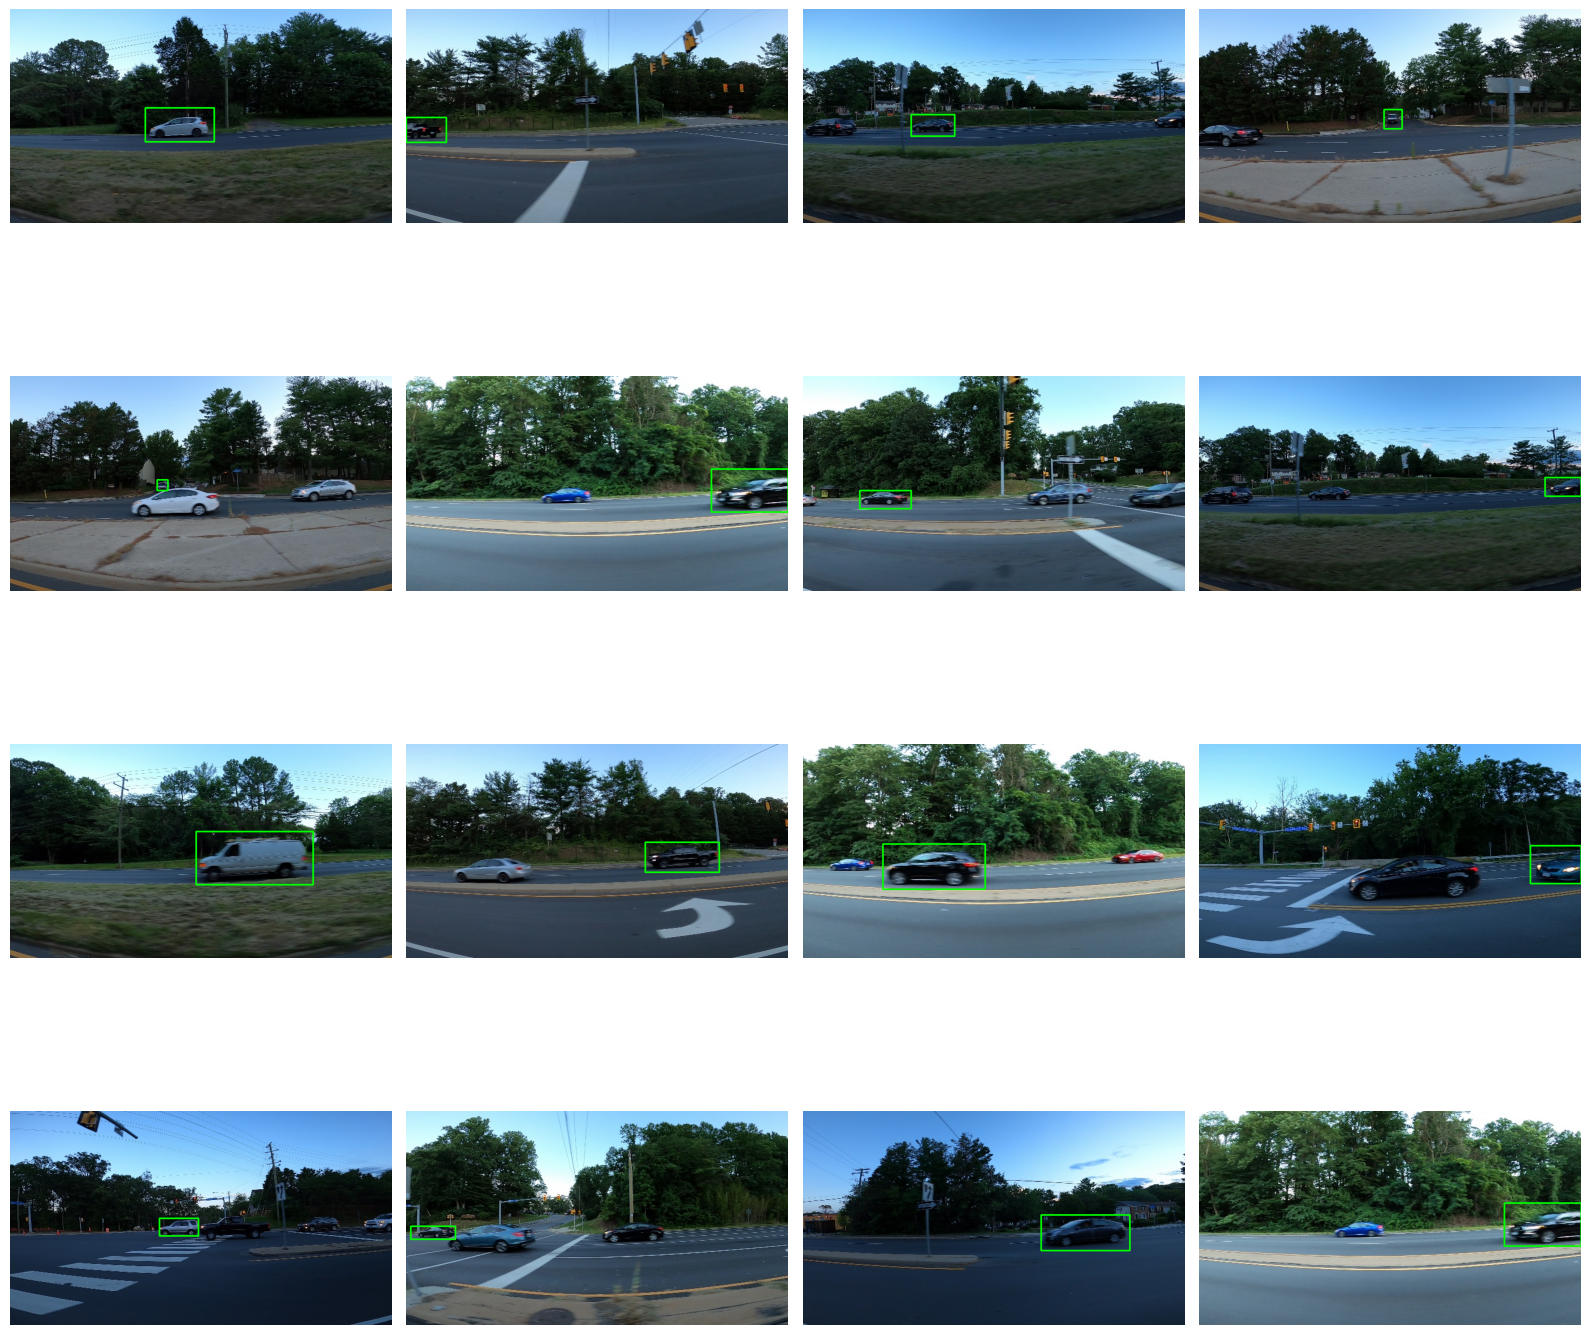

In [ ]:
base_path = '../content/sample_data/Training data'
fig, ax = plt.subplots(figsize=(16,16), nrows=4, ncols=4)
nrows=4
ncols=4
indices = np.random.randint(low=0, high=len(annotations), size=(nrows, ncols))
for i in range(nrows):
    for j in range(ncols):
        idx = indices[i,j]
        row = annotations.loc[idx]
        start = (int(row['xmin']), int(row['ymin']))
        end = (int(row['xmax']), int(row['ymax']))
        img_path = os.path.join(base_path, row['image'])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.rectangle(img, start, end, color=(0,255,0), thickness=2)
        ax[i,j].axis('off')
        ax[i,j].imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
annotations['xcenter'] = (annotations['xmin']+annotations['xmax'])/2
annotations['ycenter'] = (annotations['ymin']+annotations['ymax'])/2
annotations['width'] = (annotations['xmax'] - annotations['xmin'])
annotations['height'] = (annotations['ymax'] - annotations['ymin'])

In [ ]:
h,w,c = img.shape

In [ ]:
annotations['xcenter'] = annotations['xcenter']/w
annotations['width'] = annotations['width']/w
annotations['ycenter'] = annotations['ycenter']/h
annotations['height'] = annotations['height']/h
annotations['image'] = annotations['image'].apply(lambda x: os.path.join(base_path,x))
annotations = annotations[['image', 'xcenter','ycenter','width','height']]

In [ ]:
annotations.head()

,image,xcenter,ycenter,width,height
0,../content/sample_data/Training data/vid_4_100...,0.450434,0.539817,0.068741,0.095238
1,../content/sample_data/Training data/vid_4_100...,0.100217,0.557191,0.155572,0.129987
2,../content/sample_data/Training data/vid_4_100...,0.444645,0.543678,0.181621,0.157014
3,../content/sample_data/Training data/vid_4_100...,0.833213,0.531451,0.197540,0.155727
4,../content/sample_data/Training data/vid_4_100...,0.110347,0.559122,0.171491,0.136422


In [ ]:
train_path = os.path.join('Data','train')
test_path = os.path.join('Data','test')
val_path = os.path.join('Data','val')

os.makedirs(train_path, exist_ok=True)
print('Made folder for train images')
os.makedirs(val_path, exist_ok=True)
print('Made folder for validation images')
os.makedirs(test_path, exist_ok=True)
print('Made folder for test images')

Made folder for train images
Made folder for validation images
Made folder for test images


In [ ]:
test_size = int(0.1 * len(annotations))
train_df, test_df = train_test_split(annotations, test_size=test_size)
train_df, val_df = train_test_split(train_df, test_size=test_size)

In [ ]:
data = {
    'train':{
        'df':train_df,
        'path':train_path
    },
    'val':{
        'df':val_df,
        'path':val_path
    },
    'test':{
        'df':test_df,
        'path':test_path
    }
}

In [ ]:
for subset, subset_data in data.items():
    df = subset_data['df']
    dst_path = subset_data['path']
    for idx, row in tqdm(df.iterrows()):
        src = row['image']
        img_id = src.split(os.path.sep)[-1].split('.')[0]
        extension = src.split(os.path.sep)[-1].split('.')[1]
        img_dst = os.path.join(dst_path, f'{img_id}.{extension}')
        shutil.copy2(src, img_dst)
        annotation_text = f"0 {row['xcenter']} {row['ycenter']} {row['width']} {row['height']}"
        with open(os.path.join(dst_path, f'{img_id}.txt'), 'w+') as f:
            f.write(annotation_text)
            f.write('\n')
    print(f'Done moving files for {subset} set')

0it [00:00, ?it/s]

Done moving files for train set


0it [00:00, ?it/s]

Done moving files for val set


0it [00:00, ?it/s]

Done moving files for test set


In [ ]:
config = {
    'names':['Car'],
    'nc':1,
    'train':os.path.abspath(train_path),
    'val':os.path.abspath(val_path),
    'test':os.path.abspath(test_path)
}

with open('data.yaml', 'w+') as f:
    yaml.dump(config, f, default_flow_style=False)

In [ ]:
! git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15935, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 15935 (delta 66), reused 92 (delta 63), pack-reused 15831
Receiving objects: 100% (15935/15935), 14.59 MiB | 21.55 MiB/s, done.
Resolving deltas: 100% (10935/10935), done.


In [ ]:
! pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00


In [ ]:
! wandb disabled

/bin/bash: wandb: command not found


In [ ]:
! python yolov5/train.py --data data.yaml --img 640 --batch 16 --epochs 20 --weights yolov5/yolov5s.pt

train: weights=yolov5/yolov5s.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
best_model = torch.hub.load('ultralytics/yolov5', 'custom', 'yolov5/runs/train/exp/weights/best.pt')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-2 Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
test_base_path = '../content/sample_data/Testing data'
test_img = os.listdir(test_base_path)
test_img = list(map(lambda x: os.path.join(test_base_path, x), test_img))
test_images = np.random.choice(test_img, size=(4,4))

In [ ]:
fig, ax = plt.subplots(figsize=(16,16), nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        image = cv2.imread(test_images[i,j])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = best_model(image)
        ax[i,j].axis('off')
        ax[i,j].imshow(np.squeeze(results.render()))
plt.show()